**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**REead the dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/RNN mini proj/JKH.csv")

data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
503,01/07/2022,156.75,152.0,158.25,150.0,1.47M,3.13%
504,01/06/2022,152.00,150.0,152.00,148.5,318.54K,1.00%
505,01/05/2022,150.50,147.0,151.75,147.0,1.06M,0.33%
506,01/04/2022,150.00,152.0,153.25,149.0,317.31K,-1.32%
507,01/03/2022,152.00,149.0,153.25,149.0,799.59K,1.00%


**Change the order of the dataset**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.sort_values(by='Date', ascending=True, inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

# Check the first few rows to ensure the correct order
print(data.head())

# Save the reordered data to a new CSV file
data.to_csv('reordered_data.csv', index=False)

        Date   Price   Open    High    Low     Vol. Change %
0 2022-01-03  152.00  149.0  153.25  149.0  799.59K    1.00%
1 2022-01-04  150.00  152.0  153.25  149.0  317.31K   -1.32%
2 2022-01-05  150.50  147.0  151.75  147.0    1.06M    0.33%
3 2022-01-06  152.00  150.0  152.00  148.5  318.54K    1.00%
4 2022-01-07  156.75  152.0  158.25  150.0    1.47M    3.13%


In [ ]:
data =pd.read_csv("reordered_data.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-01-03,152.00,149.0,153.25,149.0,799.59K,1.00%
1,2022-01-04,150.00,152.0,153.25,149.0,317.31K,-1.32%
2,2022-01-05,150.50,147.0,151.75,147.0,1.06M,0.33%
3,2022-01-06,152.00,150.0,152.00,148.5,318.54K,1.00%
4,2022-01-07,156.75,152.0,158.25,150.0,1.47M,3.13%
...,...,...,...,...,...,...,...
503,2024-02-16,189.50,188.5,189.50,188.0,227.87K,0.53%
504,2024-02-19,190.00,187.0,190.50,187.0,537.64K,0.26%
505,2024-02-20,191.50,190.0,192.00,190.0,432.25K,0.79%
506,2024-02-21,192.75,191.5,192.75,191.5,372.97K,0.65%


 **Modify the dataset** [Remove K values from volume column]

In [ ]:
data['Vol.'] = data['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval)

# Save the modified data to a new CSV file if needed
data.to_csv('modified_data.csv', index=False)

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-01-03,152.00,149.0,153.25,149.0,799590.0,1.00%
1,2022-01-04,150.00,152.0,153.25,149.0,317310.0,-1.32%
2,2022-01-05,150.50,147.0,151.75,147.0,1060000.0,0.33%
3,2022-01-06,152.00,150.0,152.00,148.5,318540.0,1.00%
4,2022-01-07,156.75,152.0,158.25,150.0,1470000.0,3.13%
...,...,...,...,...,...,...,...
503,2024-02-16,189.50,188.5,189.50,188.0,227870.0,0.53%
504,2024-02-19,190.00,187.0,190.50,187.0,537640.0,0.26%
505,2024-02-20,191.50,190.0,192.00,190.0,432250.0,0.79%
506,2024-02-21,192.75,191.5,192.75,191.5,372970.0,0.65%


**Splitting the data into training and testing dataset**

In [ ]:
split_index = int(0.8 * len(data))

In [ ]:
data_training = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [ ]:
data_training.tail()

,Date,Price,Open,High,Low,Vol.,Change %
401,2023-09-15,190.00,190.50,191.25,190.0,131540.0,-0.26%
402,2023-09-18,189.25,191.00,191.00,189.0,96040.0,-0.39%
403,2023-09-19,186.50,189.75,190.00,186.5,182810.0,-1.45%
404,2023-09-20,186.50,187.00,187.00,185.0,148160.0,0.00%
405,2023-09-21,188.00,187.00,188.50,185.5,970900.0,0.80%


In [ ]:
test_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
503,2024-02-16,189.50,188.5,189.50,188.0,227870.0,0.53%
504,2024-02-19,190.00,187.0,190.50,187.0,537640.0,0.26%
505,2024-02-20,191.50,190.0,192.00,190.0,432250.0,0.79%
506,2024-02-21,192.75,191.5,192.75,191.5,372970.0,0.65%
507,2024-02-22,194.00,192.0,194.50,192.0,679780.0,0.65%


**Drop the columns Date and Change % from the training dataset**

In [ ]:
train_data = data_training.drop(['Date', 'Change %'], axis = 1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   406 non-null    float64
 1   Open    406 non-null    float64
 2   High    406 non-null    float64
 3   Low     406 non-null    float64
 4   Vol.    406 non-null    float64
dtypes: float64(5)
memory usage: 16.0 KB


**Scale Features**

In [ ]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
train_data

array([[0.42553191, 0.39577039, 0.42105263, 0.41587302, 0.11395802],
       [0.40121581, 0.43202417, 0.42105263, 0.41587302, 0.04515092],
       [0.40729483, 0.37160121, 0.40247678, 0.39047619, 0.15111083],
       ...,
       [0.8449848 , 0.88821752, 0.87616099, 0.89206349, 0.02596174],
       [0.8449848 , 0.85498489, 0.83900929, 0.87301587, 0.02101821],
       [0.86322188, 0.85498489, 0.85758514, 0.87936508, 0.1383989 ]])

**Train the model on data of 60 days at a time**

In [ ]:
#create a data structure with 60 timestamp and 1 output
x_train=[]
y_train=[]

for i in range(60,train_data.shape[0]):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i,0])

#converting x_train and y_train into numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(346, 60, 5)

**BUILDING LSTM**

In [ ]:
#Define an object(initializing)
regressor = Sequential()

In [ ]:
# #first LSTM layer
# regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape=(x_train.shape[1], 5)))
# regressor.add(Dropout(0.2))

# #second LSTM layer
# regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
# regressor.add(Dropout(0.2))

# #third LSTM layer
# regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
# regressor.add(Dropout(0.2))

# #fourth LSTM layer
# regressor.add(LSTM(units = 50, activation = 'relu'))
# regressor.add(Dropout(0.2))

In [ ]:
#first LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

#second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [ ]:
#output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

**Compile the model**

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

**Train the model**

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
11/11 [==============================] - 10s 20ms/step - loss: 0.0394
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0174
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0124
Epoch 4/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0113
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0127
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0120
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0117
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0104
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0096
Epoch 10/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0092
Epoch 11/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0104
Epoch 12/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0098
Epoch 13/100
11/11 [====

**Prepare test dataset**

In [ ]:
test_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
406,2023-09-22,190.00,189.00,190.25,188.00,431480.0,1.06%
407,2023-09-25,191.00,189.50,191.25,189.50,392120.0,0.53%
408,2023-09-26,192.50,190.25,192.75,190.00,874310.0,0.79%
409,2023-09-27,192.50,192.50,194.50,192.50,1130000.0,0.00%
410,2023-10-02,190.25,192.25,192.25,189.75,863270.0,-1.17%


In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
past_60_days

,Date,Price,Open,High,Low,Vol.,Change %
346,2023-06-23,145.25,143.75,145.50,143.00,424200.0,1.40%
347,2023-06-26,150.00,146.00,150.50,146.00,836730.0,3.27%
348,2023-06-27,150.00,150.00,150.75,148.75,1360000.0,0.00%
349,2023-06-28,149.75,150.00,150.25,149.75,2080000.0,-0.17%
350,2023-07-04,159.00,151.00,159.00,150.00,646300.0,6.18%
351,2023-07-05,159.50,160.00,161.00,155.50,933670.0,0.31%
352,2023-07-06,155.75,158.50,158.50,155.00,122110.0,-2.35%
353,2023-07-07,156.00,155.75,156.00,154.00,666720.0,0.16%
354,2023-07-10,157.50,156.00,157.50,155.50,83780.0,0.96%
355,2023-07-11,158.50,157.00,159.00,157.00,175440.0,0.63%


In [ ]:
df = past_60_days.append(test_data, ignore_index = True)
df

<ipython-input-27-a0f0c39024f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(test_data, ignore_index = True)


,Date,Price,Open,High,Low,Vol.,Change %
0,2023-06-23,145.25,143.75,145.50,143.00,424200.0,1.40%
1,2023-06-26,150.00,146.00,150.50,146.00,836730.0,3.27%
2,2023-06-27,150.00,150.00,150.75,148.75,1360000.0,0.00%
3,2023-06-28,149.75,150.00,150.25,149.75,2080000.0,-0.17%
4,2023-07-04,159.00,151.00,159.00,150.00,646300.0,6.18%
...,...,...,...,...,...,...,...
157,2024-02-16,189.50,188.50,189.50,188.00,227870.0,0.53%
158,2024-02-19,190.00,187.00,190.50,187.00,537640.0,0.26%
159,2024-02-20,191.50,190.00,192.00,190.00,432250.0,0.79%
160,2024-02-21,192.75,191.50,192.75,191.50,372970.0,0.65%


In [ ]:
df = df.drop(['Date', 'Change %'], axis = 1)
df.head()

,Price,Open,High,Low,Vol.
0,145.25,143.75,145.50,143.00,424200.0
1,150.00,146.00,150.50,146.00,836730.0
2,150.00,150.00,150.75,148.75,1360000.0
3,149.75,150.00,150.25,149.75,2080000.0
4,159.00,151.00,159.00,150.00,646300.0


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.34346505, 0.33232628, 0.3250774 , 0.33968254, 0.06040096],
       [0.40121581, 0.35951662, 0.3869969 , 0.37777778, 0.1192568 ],
       [0.40121581, 0.40785498, 0.39009288, 0.41269841, 0.19391197],
       [0.39817629, 0.40785498, 0.38390093, 0.42539683, 0.29663469],
       [0.5106383 , 0.41993958, 0.49226006, 0.42857143, 0.09208807],
       [0.51671733, 0.52870091, 0.51702786, 0.4984127 , 0.13308727],
       [0.47112462, 0.51057402, 0.48606811, 0.49206349, 0.01730165],
       [0.47416413, 0.47734139, 0.45510836, 0.47936508, 0.0950014 ],
       [0.49240122, 0.48036254, 0.47368421, 0.4984127 , 0.01183309],
       [0.50455927, 0.49244713, 0.49226006, 0.51746032, 0.02491026],
       [0.49848024, 0.49244713, 0.49226006, 0.51746032, 0.23385969],
       [0.50759878, 0.51359517, 0.49845201, 0.53015873, 0.06688391],
       [0.49240122, 0.50453172, 0.47987616, 0.5047619 , 0.02995509],
       [0.50455927, 0.49848943, 0.49226006, 0.52380952, 0.01973275],
       [0.4893617 , 0.51057402, 0.

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((102, 60, 5), (102,))

In [ ]:
print(X_test.shape)

(102, 60, 5)


In [ ]:
print(regressor.input_shape)

(None, 60, 5)


**Prediction**

In [ ]:
y_pred = regressor.predict(X_test)

4/4 [==============================] - 1s 7ms/step


In [ ]:
#get back to the original scale
scaler.scale_

array([1.21580547e-02, 1.20845921e-02, 1.23839009e-02, 1.26984127e-02,
       1.42670448e-07])

In [ ]:
#get all the values to the original scale
scale = 1/1.21580547e-02
scale

82.25000007608125

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

**Visualize Predictions**

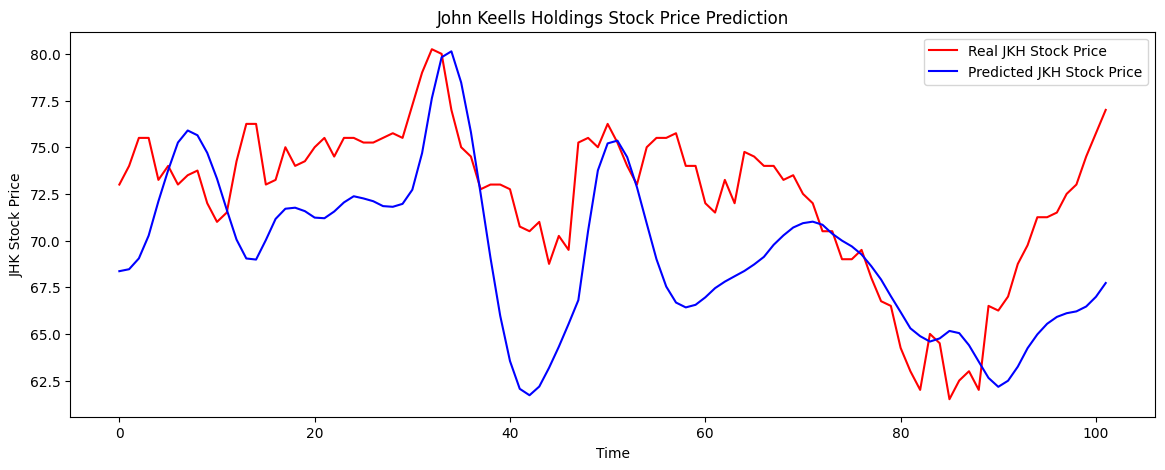

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real JKH Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted JKH Stock Price')
plt.title('John Keells Holdings Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('JHK Stock Price')
plt.legend()
plt.show()

**Calculate Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming y_true are the actual target values and y_pred are the predicted values
# These can be obtained from your model

# Compute the squared differences between actual and predicted values
squared_diff = (y_test - y_pred) ** 2

# Compute the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)

# Compute the RMSE by taking the square root of the mean squared differences
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 6.468539357782125
